In [1352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [1353]:
import warnings
warnings.filterwarnings('ignore')

In [1354]:
benz_train =pd.read_csv("D:\\Simplilearn\\ML\\Benz\\train.csv")

In [1355]:
benz_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [1356]:
benz_train.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [1359]:
benz_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [1360]:
#benz_train.ID.shape

In [ ]:
#seperating catageory and numerical data into different data frames

In [1361]:
benz_train_cat = benz_train.select_dtypes(exclude=["float64","int64"])
benz_train_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [1362]:
benz_train_int = benz_train.select_dtypes(include=["float64","int64"])
benz_train_int.head()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [1363]:
benz_train_int_var = pd.DataFrame(benz_train_int.var(axis=0),columns=['Variance'])

In [1364]:
benz_train_int_var.head()

,Variance
ID,5.941936e+06
y,1.607667e+02
X10,1.313092e-02
X11,0.000000e+00
X12,6.945713e-02


In [1365]:
#Dropping the columns with variance is == 0
benz_train_int_var_dropped = benz_train_int.drop(columns=benz_train_int_var[benz_train_int_var.Variance==0].index)

In [1366]:
benz_train_int_var[benz_train_int_var.Variance==0] # 12 columns with variance ==0

,Variance
X11,0.0
X93,0.0
X107,0.0
X233,0.0
X235,0.0
X268,0.0
X289,0.0
X290,0.0
X293,0.0
X297,0.0


In [1367]:
benz_train_int_var_dropped.head()

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1368]:
benz_train_int_var_dropped.describe() #just to check the distribution of the Y variable

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking whether the  target variable Y is normally distributed, Outlier treatment

<AxesSubplot:xlabel='y', ylabel='Density'>

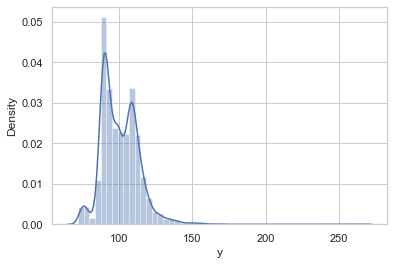

In [1369]:
sns.distplot(benz_train_int_var_dropped["y"])

# yeah!! the data is normally distributed since mean(100.669318) and median(99.150000) are closer

<AxesSubplot:xlabel='y'>

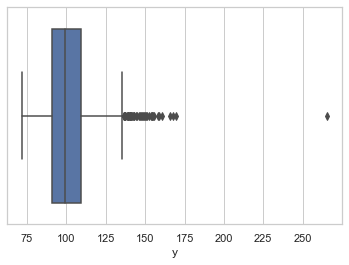

In [1370]:
sns.boxplot(benz_train_int_var_dropped["y"]) #check if the y variable has any outliers

In [1371]:
print(benz_train_int_var_dropped["y"].quantile(0.50))

99.15


In [1372]:
print(benz_train_int_var_dropped["y"].quantile(0.95)) 

120.806


In [1373]:
benz_train_int_var_dropped["y"] = np.where(benz_train_int_var_dropped["y"] > 120.80600000000001, 99.15, benz_train_int_var_dropped["y"])

In [1374]:
train_y = pd.DataFrame(benz_train_int_var_dropped["y"]) #seperating Y variable 

In [1375]:
train_y.head()

,y
0,99.15
1,88.53
2,76.26
3,80.62
4,78.02


In [1376]:
benz_train_int_var_dropped_y = benz_train_int_var_dropped.drop(["y"], axis=1)

In [1377]:
benz_train_int_var_dropped_y.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Apply label encoder.

In [1382]:
#Lable encoder for catagorical data
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [1383]:
benz_train_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [1384]:
benz_train_cat_LE =benz_train_cat.apply(LabelEncoder().fit_transform)  #Applying lable encoder on catageorical data

In [1385]:
benz_train_cat_LE.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


In [1386]:
benz_train_clean = pd.concat([benz_train_int_var_dropped_y,benz_train_cat_LE], axis=1,)

In [1387]:
benz_train_clean= benz_train_clean.drop(["ID"], axis=1) #dropping ID column it is not required for scaling or modeling

In [1388]:
benz_train_clean.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,0,1,0,0,0,0,1,0,0,...,0,0,32,23,17,0,3,24,9,14
1,0,0,0,0,0,0,0,1,0,0,...,0,0,32,21,19,4,3,28,11,14
2,0,0,0,0,0,0,1,0,0,0,...,0,0,20,24,34,2,3,27,9,23
3,0,0,0,0,0,0,0,0,0,0,...,0,0,20,21,34,5,3,27,11,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,20,23,34,5,3,12,3,13


In [1389]:
benz_train_clean.shape#checking the shape befor going to scale

(4209, 364)

In [1472]:
benz_train_clean.dtypes.value_counts()

int64    356
int32      8
dtype: int64

# Scaling the numerical data of train data

In [1391]:
#lets scale numerical values
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()

In [1392]:
benz_train_clean_mn = mn.fit_transform(benz_train_clean)

In [1393]:
benz_train_clean_mn_df =pd.DataFrame(benz_train_clean_mn, columns=benz_train_clean.columns, index=benz_train_clean.index)

In [1394]:
benz_train_clean_mn_df.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.695652,0.884615,0.395349,0.000000,1.0,0.857143,0.818182,0.583333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.695652,0.807692,0.441860,0.666667,1.0,1.000000,1.000000,0.583333
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.434783,0.923077,0.790698,0.333333,1.0,0.964286,0.818182,0.958333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.434783,0.807692,0.790698,0.833333,1.0,0.964286,1.000000,0.166667
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.434783,0.884615,0.790698,0.833333,1.0,0.428571,0.272727,0.541667


# Start cleaning the test data

In [1395]:
benz_test =pd.read_csv("D:\\Simplilearn\\ML\\Benz\\test.csv")

In [1396]:
benz_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [1397]:
benz_test.dtypes.value_counts()

int64     369
object      8
dtype: int64

In [1398]:
benz_test.isnull().any().sum() #no null values in test data too 

0

In [1399]:
#likewise train data seperate the cat and num data
benz_test_cat = benz_test.select_dtypes(exclude=["float64","int64"])
benz_test_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [1400]:
benz_test_int = benz_test.select_dtypes(include=["float64","int64"])
benz_test_int.head()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [1401]:
# In test dataset, remove the same features of train dataset having 0 variance.
benz_test_int_var= benz_test_int.drop(columns=['X11', 'X93', 'X107','X233', 'X235', 'X268', 'X289', 'X290', 'X293','X297','X330','X347'])

In [1402]:
#here on test data we will not perform Dropping the columns with variance is == 0, because it is test data
#So we will be drooping the same columns which had 0 variance in train data

In [1403]:
benz_test_int_var.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [1404]:
#Label encoder for cat data
benz_test_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [1405]:
benz_test_cat_LE = benz_test_cat.apply(LabelEncoder().fit_transform)

In [1406]:
benz_test_cat_LE.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12


In [1407]:
benz_test_clean = pd.concat([benz_test_int_var,benz_test_cat_LE], axis=1,)

In [1408]:
benz_test_clean.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,1,0,0,0,0,0,0,0,0,0,...,0,0,21,23,34,5,3,26,0,22
1,2,0,0,0,0,0,0,0,0,1,...,0,0,42,3,8,0,3,9,6,24
2,3,0,0,0,1,0,0,0,0,0,...,0,0,21,23,17,5,3,0,9,9
3,4,0,0,0,0,0,0,0,0,0,...,0,0,21,13,34,5,3,31,11,13
4,5,0,0,0,1,0,0,0,0,0,...,0,0,45,20,17,2,3,30,8,12


In [1409]:
benz_test_ID = benz_test_clean["ID"] #drop ID from test data as well and assign it to new variable

In [1410]:
benz_test_clean = benz_test_clean.drop(["ID"], axis=1)

In [1411]:
benz_test_clean.dtypes.value_counts()

int64    356
int32      8
dtype: int64

In [1412]:
benz_test_clean.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,21,23,34,5,3,26,0,22
1,0,0,0,0,0,0,0,0,1,0,...,0,0,42,3,8,0,3,9,6,24
2,0,0,0,1,0,0,0,0,0,0,...,0,0,21,23,17,5,3,0,9,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,21,13,34,5,3,31,11,13
4,0,0,0,1,0,0,0,0,0,0,...,0,0,45,20,17,2,3,30,8,12


# Scaling the Test data: Min Max scaler

In [1413]:
benz_test_clean_mn = mn.fit_transform(benz_test_clean) #scaling using MinMax scaler on test data

In [1414]:
benz_test_clean_mn_df =pd.DataFrame(benz_test_clean_mn, columns=benz_test_clean.columns, index=benz_test_clean.index)

In [1415]:
benz_test_clean_mn_df.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.4375,0.884615,0.772727,0.833333,1.0,0.838710,0.000000,0.916667
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.8750,0.115385,0.181818,0.000000,1.0,0.290323,0.545455,1.000000
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.4375,0.884615,0.386364,0.833333,1.0,0.000000,0.818182,0.375000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.4375,0.500000,0.772727,0.833333,1.0,1.000000,1.000000,0.541667
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.9375,0.769231,0.386364,0.333333,1.0,0.967742,0.727273,0.500000


In [1416]:
benz_test_clean_mn_df.shape

(4209, 364)

# PCA-  Dimensional Reduction using PCA

In [1417]:
from sklearn.decomposition import PCA
pca = PCA()
pca_benz_train_clean_mn_df = pca.fit_transform(benz_train_clean_mn_df)

In [1418]:
pca_transform_test_90 = pca_90.transform(benz_test_clean_mn_df)

In [1419]:
explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

In [1420]:
explained_variance.sum()

1.0

In [1421]:
per_var = pd.DataFrame(np.round(pca.explained_variance_ratio_ * 100, decimals=3))
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

In [1422]:
per_var.sum()

0    100.001
dtype: float64

In [1423]:
per_var.head(10)

,0
0,12.972
1,8.752
2,8.519
3,6.748
4,5.638
5,4.696
6,3.763
7,3.240
8,2.779
9,2.475


In [1424]:
per_var.head(50).sum() #to get 90% accuracy we need to consider first 50 columns- later we can change it accordingly

0    90.116
dtype: float64

In [1425]:
pca_90 = PCA(0.9) #passing the parameters that 90% accuracy needed
pca_fit_90 = pca_90.fit_transform(benz_train_clean_mn_df)

In [1426]:
per_var_90 = np.round(pca_90.explained_variance_ratio_ * 100, decimals=2)

In [1427]:
np.cumsum(per_var_90)
#out of 364 columns we are considering 50 columns

array([12.97, 21.72, 30.24, 36.99, 42.63, 47.33, 51.09, 54.33, 57.11,
       59.58, 61.89, 63.84, 65.54, 67.17, 68.69, 70.15, 71.53, 72.74,
       73.77, 74.78, 75.74, 76.63, 77.51, 78.34, 79.13, 79.89, 80.61,
       81.26, 81.9 , 82.47, 83.  , 83.51, 83.99, 84.45, 84.89, 85.31,
       85.73, 86.13, 86.53, 86.91, 87.27, 87.61, 87.95, 88.29, 88.62,
       88.93, 89.24, 89.54, 89.83, 90.11])

In [1428]:
print(len(pca_fit_90[0]))

50


In [1429]:
labels = ['PC' + str(x) for x in range(1, len(per_var_90)+1)]

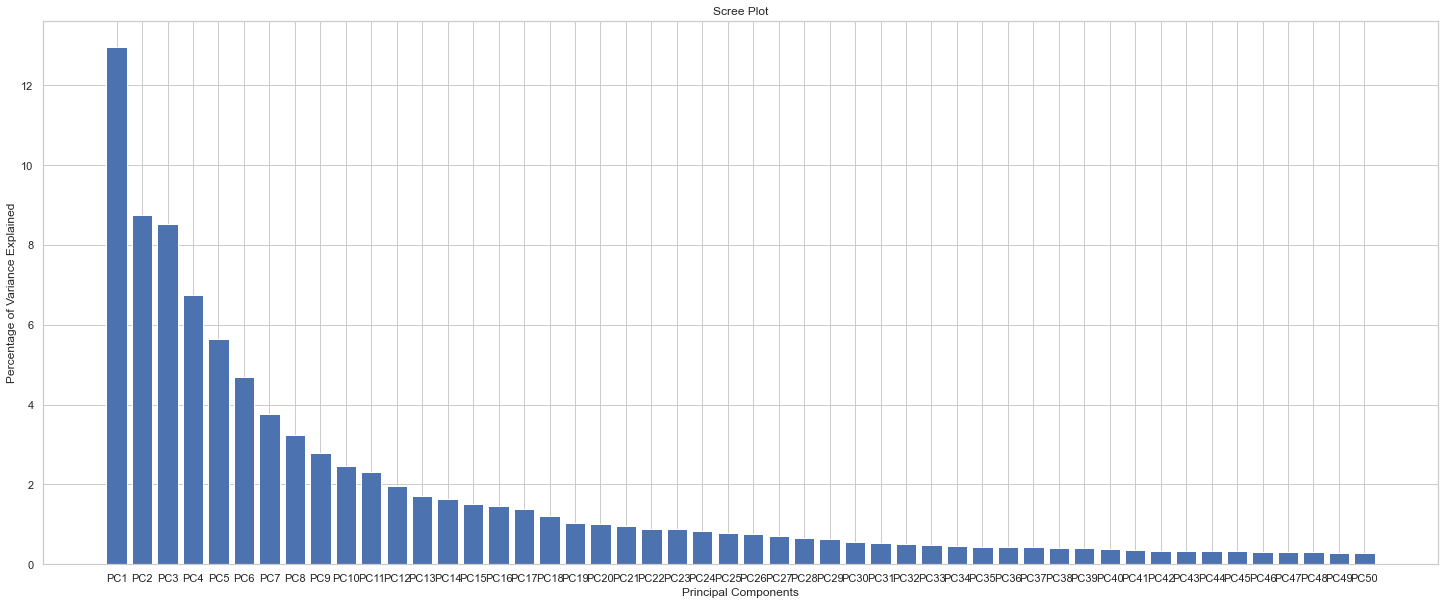

In [1430]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.bar(x=range(1, len(per_var_90)+1),height= per_var_90,tick_label=labels)
plt.ylabel("Percentage of Variance Explained")
plt.xlabel("Principal Components")
plt.title('Scree Plot')
plt.show()

In [1431]:
pca_90_df = pd.DataFrame(pca_fit_90,columns=labels )

In [1432]:
pca_90_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,0.682272,2.217390,1.233625,0.885738,1.401423,0.054226,0.654869,-0.937416,0.192658,-0.678833,...,-0.301784,0.082351,0.376096,-0.123603,1.037195,0.282469,-0.741828,-0.503630,-1.131286,-0.650869
1,-0.279051,1.164201,-0.764263,-0.660639,0.237862,0.066811,1.237312,-0.530352,-0.108645,0.499650,...,-0.090422,0.155252,0.025554,0.148211,0.105227,-0.089335,-0.013777,0.042125,-0.106445,0.008773
2,-1.018083,2.979512,0.558557,2.540751,-0.926713,3.282629,-0.940275,0.557085,-0.926063,-0.108851,...,0.392666,0.341743,0.352159,-0.072961,-0.213758,0.100651,-0.554772,-0.251824,-0.499742,-0.178818
3,-0.658559,2.545045,-0.425408,2.997377,-1.681631,3.134973,0.074150,0.083995,-1.072810,0.243721,...,-0.630611,-0.219829,-0.070023,-0.619896,-0.260746,-0.028494,0.051949,0.077641,0.366246,-0.427390
4,-0.652313,2.370739,-0.583703,3.194208,-1.999394,3.167654,-0.143355,0.229284,-1.754722,-0.355889,...,-0.003493,-0.434347,0.188307,-0.517897,0.024977,-0.098782,0.116541,0.084835,0.035156,-0.312985


In [1433]:
pca_90_df.shape

(4209, 50)

In [1434]:
!pip install xgboost #installing Xgboost

In [1435]:
# import the required libraries
import xgboost as xgb
from sklearn.model_selection import cross_val_score,cross_val_predict
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [1437]:
XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [1438]:
#from skitlearn site we gathered the range where the best parameters lies in
params={ 'learning_rate'   : [0.01,0.05,0.1,1] ,
         'max_depth'       : [2,3,5,10],
         'min_child_weight': [ 0, 1, 3],
         'n_estimators'    : [100,150,200,500],
         'gamma'           : [1e-2,1e-3,0,0.1,0.01,0.5,1],
         'colsample_bytree': [0.1,0.5,0.7,1],
         'subsample'       : [0.2,0.3,0.5,1],
         'reg_lambda'      : [0,1,10],
         'reg_alpha'       : [1e-5,1e-3,1e-1,1,1e1]}

In [1439]:
xgb_reg = xgb.XGBRegressor()

In [1440]:
Random_Search=RandomizedSearchCV(xgb_reg,params,cv=10, scoring='r2', return_train_score=True, n_jobs=-1,verbose=1) 

In [1441]:
Random_Search.fit(pca_fit_90,train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                        'gamma': [0.01, 0.001, 0, 0.1, 0.01,
    

In [1442]:
Random_Search.best_params_ #best parameters from random search 

{'subsample': 0.5,
 'reg_lambda': 0,
 'reg_alpha': 10.0,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 2,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 1}

In [1443]:
Random_Search.best_estimator_ #best estimators from random search 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=10.0, reg_lambda=0, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1461]:
# Instantiate the XGBoost classifier with the best estimators and parameters
xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0.1, reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1462]:
r2_Score

array([0.59189747, 0.5571714 , 0.46061637, 0.60394419, 0.61082587,
       0.56740745, 0.41728968, 0.58178231, 0.59871083, 0.60498835])

In [1463]:
round(r2_Score.mean(),2) #r-square is between 50-100 % so it is okay to move on with the model

0.56

In [ ]:
This means the model explains 56% variability of the target variable (y)(time) around its mean.

In [1464]:
xgb_reg.fit(pca_fit_90,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0.1, reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Passing the test data for predection

In [1466]:
benz_test_pred=xgb_reg.predict(pca_transform_test_90)

In [1467]:
benz_test_pred

array([ 78.87767,  93.90811,  78.36242, ...,  92.9734 , 106.48379,
        90.44   ], dtype=float32)

In [1468]:
# print the predicted value (time) in the form of table
df_test_pred = pd.DataFrame({'ID': benz_test_ID, 'y': benz_test_pred})

In [1470]:
# Print the first 10 predicted values
df_test_pred.head(10)

,ID,y
0,1,78.877670
1,2,93.908112
2,3,78.362419
3,4,78.691818
4,5,109.884758
5,8,92.630020
6,10,109.781242
7,11,96.902756
8,12,110.645546
9,14,91.780350


# Thank you